# Import files, libraries, define path and initialize lists

In [3]:
!pip install kagglehub
from google.colab import files

import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:17<00:00, 166MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [4]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import glob
import os
import shutil
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint

Mounted at /content/drive


In [5]:
# Define the dataset path
root_folder = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

data_dir = os.path.join(root_folder, 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/')

test_path = os.path.join(root_folder, 'test/test')
train_path = os.path.join(data_dir, 'train')
valid_path = os.path.join(data_dir, 'valid')

In [6]:
# Initialize lists
image_paths = []
species_labels = []
disease_labels = []
dataset_split = []

# Function to process a dataset directory
def process_directory(base_path, split_name):
    for class_folder in os.listdir(base_path):
        class_folder_path = os.path.join(base_path, class_folder)
        if os.path.isdir(class_folder_path):
            species, disease = class_folder.split('___')
            for image_name in os.listdir(class_folder_path):
                image_paths.append(os.path.join(class_folder_path, image_name))
                species_labels.append(species)
                disease_labels.append(disease)
                dataset_split.append(split_name)

# Process train and valid
process_directory(train_path, 'train')
process_directory(valid_path, 'valid')

# Create DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'species': species_labels,
    'disease': disease_labels,
    'split': dataset_split
})

# MobileNetV2

In [ ]:
#Define model name
Model_name = 'Niels_MobileNetV2_frozen_v1'

# Define the image generators for the training and validation set
batch_size = 32
num_classes = 38
img_size = (256, 256)

train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True)

# Import the MobileNetV2 model as a baseline
base_model = MobileNetV2(weights = "imagenet", include_top = False, input_shape = (256, 256, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
model_mbn = Sequential()
model_mbn.add(base_model)
model_mbn.add(GlobalAveragePooling2D())
model_mbn.add(Dense(1024, activation = "relu"))
model_mbn.add(Dropout(rate = 0.2))
model_mbn.add(Dense(512, activation = "relu"))
model_mbn.add(Dropout(rate = 0.2))
model_mbn.add(Dense(num_classes, activation = "softmax"))

# Compile the model
optimizer = Adam(learning_rate = 0.001)
model_mbn.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define callbacks
callbacks = [
    ModelCheckpoint(f"{Model_name}.keras", save_best_only=True)
]

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


<ipython-input-5-ca99b043f0b3>:28: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights = "imagenet", include_top = False, input_shape = (256, 256, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Training the model
model_mbn.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator,
    callbacks = callbacks
    )

Epoch 1/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9539 - loss: 0.1452 - val_accuracy: 0.9585 - val_loss: 0.1279
Epoch 2/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.9580 - loss: 0.1307 - val_accuracy: 0.9591 - val_loss: 0.1357
Epoch 3/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 125s 57ms/step - accuracy: 0.9611 - loss: 0.1265 - val_accuracy: 0.9558 - val_loss: 0.1609
Epoch 4/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.9658 - loss: 0.1092 - val_accuracy: 0.9594 - val_loss: 0.1482
Epoch 5/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 125s 57ms/step - accuracy: 0.9676 - loss: 0.1033 - val_accuracy: 0.9614 - val_loss: 0.1413
Epoch 6/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9698 - loss: 0.0999 - val_accuracy: 0.9590 - val_loss: 0.1461
Epoch 7/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 124s 56ms/step - accuracy: 0.9724 - loss: 0.0940 - val_accuracy: 0.9607 - val_loss: 0.1525
Epoch 8/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 125s 57ms/step - accuracy: 

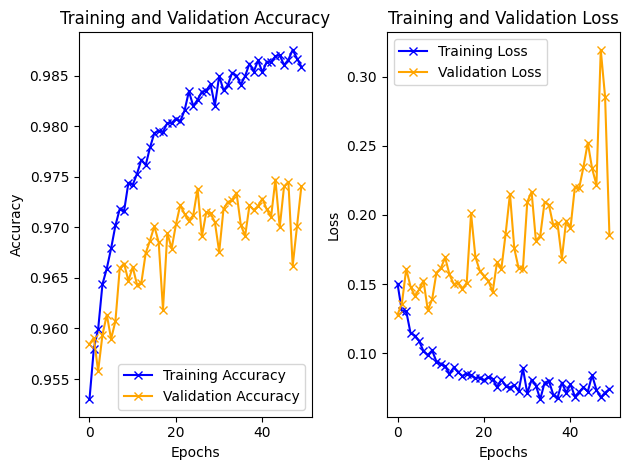

In [ ]:
history = model_mbn.history

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='x')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='x')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Summary MobileNetV2

Prediction and classification report

In [ ]:
# Generate predictions for validation set
val_pred = model_mbn.predict(validation_generator)
val_pred_classes = np.argmax(val_pred, axis=1)
true_classes = validation_generator.classes

# Classification report
class_report = classification_report(true_classes, val_pred_classes)
print("Classification Report:\n", class_report)

550/550 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.03      0.03       504
           1       0.04      0.04      0.04       497
           2       0.02      0.02      0.02       440
           3       0.02      0.02      0.02       502
           4       0.03      0.03      0.03       454
           5       0.01      0.01      0.01       421
           6       0.03      0.03      0.03       456
           7       0.01      0.01      0.01       410
           8       0.02      0.02      0.02       477
           9       0.03      0.03      0.03       477
          10       0.03      0.03      0.03       465
          11       0.03      0.03      0.03       472
          12       0.04      0.04      0.04       480
          13       0.02      0.02      0.02       430
          14       0.01      0.01      0.01       423
          15       0.04      0.04      0.04       503
          16  

Confusion matrix

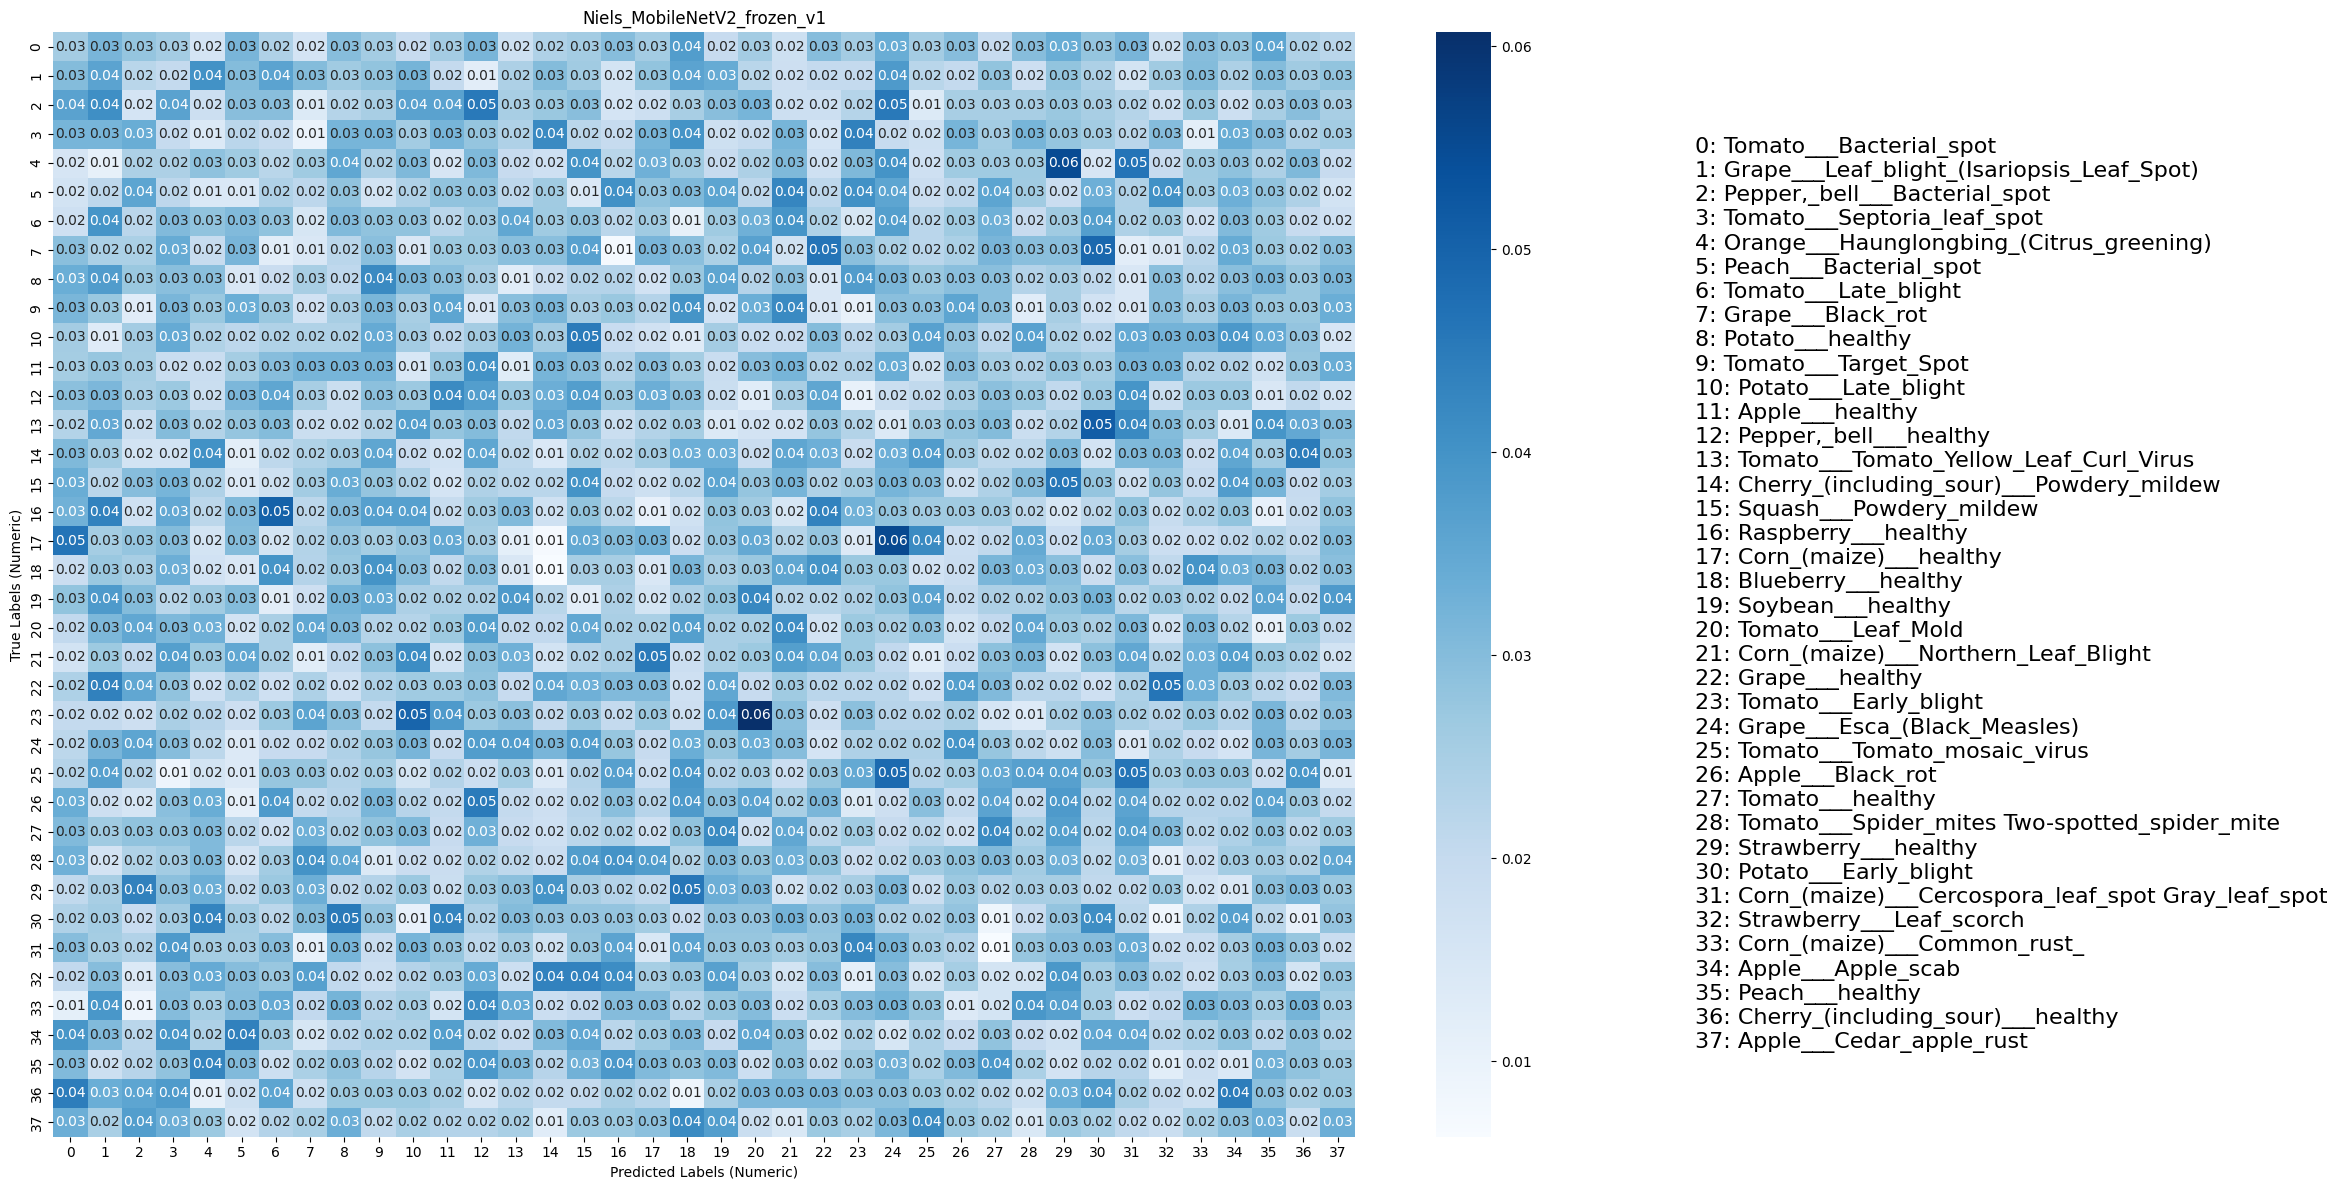

In [ ]:
def plot_confusion_matrix (y_true, y_pred, class_names, normalize=False, title=Model_name):
    """
    Plots a heatmap for the confusion matrix with numeric axis labels and a separate legend.

    Parameters:
    - y_true: Array of true labels
    - y_pred: Array of predicted labels
    - class_names: List of class names (for the legend)
    - normalize: If True, normalizes the confusion matrix
    - title: Title for the heatmap
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the heatmap
    plt.figure(figsize=(17, 12))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap='Blues', cbar=True,
                xticklabels=range(len(class_names)), yticklabels=range(len(class_names)))
    plt.title(title)
    plt.ylabel('True Labels (Numeric)')
    plt.xlabel('Predicted Labels (Numeric)')
    plt.tight_layout()

    # Add a legend for the class names
    plt.gcf().text(1, 0.5,
                   "\n".join([f"{i}: {name}" for i, name in enumerate(class_names)]),
                   fontsize=16, verticalalignment='center', horizontalalignment='left')

    plt.show()

# Extract class names
class_names = [folder_name for folder_name in os.listdir(valid_path) if os.path.isdir(os.path.join(valid_path, folder_name))]
#print("Class Names:", class_names)

plot_confusion_matrix(true_classes, val_pred_classes, class_names, normalize=True)


Save the model

In [ ]:
!ls

drive  Niels_MobileNetV2_frozen_v1.keras  Niels_VGG16_frozen_v1.keras  sample_data


In [ ]:
drive.mount('/content/drive')
save_dir = "/content/drive/MyDrive/Planting-Parents_Data_Science_project"
model_mbn.save(f"{save_dir}/{Model_name}.keras")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load model from google drive

In [ ]:
Model_name = 'Niels_MobileNetV2_frozen_v1'

model_path = f"{save_dir}/{Model_name}.keras"

# Load the model
model = load_model(model_path)
print("Model loaded successfully!")

Model loaded successfully!


Evaluate the test folder

In [ ]:
# Define helper function to preprocess a single image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img) / 255.0               # Convert to array and rescale
    return img_array

# Load and preprocess all images from the test folder
def load_test_images(test_path, target_size):
    test_images = []
    filenames = []
    for file in os.listdir(test_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Supported file formats
            file_path = os.path.join(test_path, file)
            test_images.append(preprocess_image(file_path, target_size))
            filenames.append(file)  # Save filenames for reference
    return np.array(test_images), filenames

# Function to check if prediction is correct based on common words
def is_prediction_correct(file_name, predicted_label):
    # Extract meaningful words from file name (split camel case or concatenated words)
    file_name = re.sub(r'\.\w+$', '', file_name)  # Remove file extension
    file_words = set(word.lower() for word in re.findall(r'[A-Z][a-z]*|[a-z]+', file_name))  # Handle camel case and lowercase

    # Extract meaningful words from predicted label
    label_words = set(word.lower() for word in re.findall(r'[A-Za-z]+', predicted_label))  # Convert to lowercase

    # Check if all file words are in the label words
    is_subset = file_words.issubset(label_words)

    # Debugging output to verify
    #print(f"File Words: {file_words}, Label Words: {label_words}, Is Subset: {is_subset}")

    return is_subset

# Parameters
IMG_SIZE = (256, 256)  # Adjust to model's input size
test_path = test_path  # Define the test folder path

# Load and preprocess test images
test_images, filenames = load_test_images(test_path, target_size=IMG_SIZE)

# Make Predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_labels = train_generator.class_indices
class_indices = {v: k for k, v in class_labels.items()}  # Reverse mapping of class indices
predicted_labels = [class_indices[idx] for idx in predicted_classes]

# Process and evaluate predictions
results = []

for file, pred, label in zip(filenames, predictions, predicted_labels):
    confidence = np.max(pred)  # Get the highest probability (confidence score)
    is_correct = is_prediction_correct(file, label)  # Check prediction correctness
    results.append({"True class": file, "prediction": label, "confidence": confidence, "Correct": int(is_correct)})
    print(f"True class: {file}, Prediction: {label}, Confidence: {confidence:.2f}, Correct: {is_correct}")

# Summary of results
correct_predictions = sum(result['Correct'] for result in results)
total_predictions = len(results)
accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f"Total Predictions: {total_predictions}, Correct: {correct_predictions}, Accuracy: {accuracy:.2%}")

1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
True class: CornCommonRust1.JPG, Prediction: Corn_(maize)___Common_rust_, Confidence: 1.00, Correct: True
True class: PotatoEarlyBlight3.JPG, Prediction: Potato___Early_blight, Confidence: 1.00, Correct: True
True class: TomatoEarlyBlight6.JPG, Prediction: Tomato___Early_blight, Confidence: 1.00, Correct: True
True class: TomatoEarlyBlight1.JPG, Prediction: Tomato___Early_blight, Confidence: 1.00, Correct: True
True class: TomatoEarlyBlight3.JPG, Prediction: Tomato___Early_blight, Confidence: 1.00, Correct: True
True class: TomatoEarlyBlight5.JPG, Prediction: Tomato___Early_blight, Confidence: 1.00, Correct: True
True class: TomatoYellowCurlVirus6.JPG, Prediction: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 1.00, Correct: True
True class: PotatoHealthy1.JPG, Prediction: Potato___healthy, Confidence: 1.00, Correct: True
True class: PotatoEarlyBlight2.JPG, Prediction: Potato___Early_blight, Confidence: 1.00, Correct: True
True class: CornCommon

In [ ]:
# Define helper function to preprocess a single image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img) / 255.0               # Convert to array and rescale
    return img_array

# Load and preprocess all images from the test folder
def load_test_images(test_path, target_size):
    test_images = []
    filenames = []
    for file in os.listdir(test_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Supported file formats
            file_path = os.path.join(test_path, file)
            test_images.append(preprocess_image(file_path, target_size))
            filenames.append(file)  # Save filenames for reference
    return np.array(test_images), filenames

# Parameters
IMG_SIZE = (256, 256)  # Adjust to model's input size
test_path = test_path

# Load and preprocess test images
test_images, filenames = load_test_images(test_path, target_size=IMG_SIZE)

# Make Predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_labels = train_generator.class_indices
class_indices = {v: k for k, v in class_labels.items()}  # Reverse mapping of class indices
predicted_labels = [class_indices[idx] for idx in predicted_classes]

# Print predictions with filenames
results = []

for file, pred, label in zip(filenames, predictions, predicted_labels):
    confidence = np.max(pred)  # Get the highest probability (confidence score)
    print(f"True class:{file}, Predictions:{label} (Confidence: {confidence:.2f})")

    # Pause and ask for feedback
    feedback = input("Is the prediction correct? (1 for Yes, 0 for No): ")
    if feedback == "1":
        results.append({"file": file, "prediction": label, "confidence": confidence, "Correct": "1"})
    else:
        results.append({"file": file, "prediction": label, "confidence": confidence, "Correct": "0"})

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
True class:CornCommonRust1.JPG, Predictions:Corn_(maize)___Common_rust_ (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:PotatoEarlyBlight3.JPG, Predictions:Potato___Early_blight (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoEarlyBlight6.JPG, Predictions:Tomato___Early_blight (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoEarlyBlight1.JPG, Predictions:Tomato___Early_blight (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoEarlyBlight3.JPG, Predictions:Tomato___Early_blight (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoEarlyBlight5.JPG, Predictions:Tomato___Early_blight (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoYellowCurlVirus6.JPG, Predictions:Tomato___Tomato_Yellow_Leaf_Curl_Virus (Confidence: 1.00)
Is the pre

Create DataFrame and save as CSV in google drive

In [ ]:
# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Print the DataFrame
print("\nSummary of Predictions and Feedback:")
display(df_results)

# Save DataFrame to CSV
output_csv_path = f"{save_dir}/{Model_name}_predictions.csv"  # Specify the output file path
df_results.to_csv(output_csv_path, index=False)

print(f"Predictions have been saved to {output_csv_path}")


Summary of Predictions and Feedback:


,file,prediction,confidence,Correct
0,CornCommonRust1.JPG,Corn_(maize)___Common_rust_,1.000000,1
1,PotatoEarlyBlight3.JPG,Potato___Early_blight,0.999548,1
2,TomatoEarlyBlight6.JPG,Tomato___Early_blight,0.999991,1
3,TomatoEarlyBlight1.JPG,Tomato___Early_blight,0.999999,1
4,TomatoEarlyBlight3.JPG,Tomato___Early_blight,0.999935,1
5,TomatoEarlyBlight5.JPG,Tomato___Early_blight,0.999828,1
6,TomatoYellowCurlVirus6.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus,1.000000,1
7,PotatoHealthy1.JPG,Potato___healthy,1.000000,1
8,PotatoEarlyBlight2.JPG,Potato___Early_blight,1.000000,1
9,CornCommonRust3.JPG,Corn_(maize)___Common_rust_,1.000000,1


Predictions have been saved to /content/drive/MyDrive/Planting-Parents_Data_Science_project/Niels_MobileNetV2_frozen_v1_predictions.csv


prediction accuracy

In [ ]:
df_results["Correct"].value_counts(normalize=True)

,proportion
Correct,
1,0.969697
0,0.030303


# VGG16

In [7]:
#Define model name
Model_name = 'Niels_VGG16_frozen_v1'

# Define the image generators for the training and validation set
batch_size = 32
num_classes = 38
img_size = (256, 256)

train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

# Import the VGG16 model as a baseline
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
model_vgg16 = Sequential()
model_vgg16.add(base_model)
model_vgg16.add(GlobalAveragePooling2D())
model_vgg16.add(Dense(1024, activation="relu"))
model_vgg16.add(Dropout(rate=0.2))
model_vgg16.add(Dense(512, activation="relu"))
model_vgg16.add(Dropout(rate=0.2))
model_vgg16.add(Dense(num_classes, activation="softmax"))

# Compile the model
optimizer = Adam(learning_rate = 0.001)
model_vgg16.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define callbacks
callbacks = [
    ModelCheckpoint(f"{Model_name}.keras", save_best_only=True)
]

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Training the model
model_vgg16.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator,
    callbacks = callbacks
    )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 158s 66ms/step - accuracy: 0.6051 - loss: 1.3382 - val_accuracy: 0.8805 - val_loss: 0.3547
Epoch 2/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 124s 56ms/step - accuracy: 0.8658 - loss: 0.3896 - val_accuracy: 0.9162 - val_loss: 0.2475
Epoch 3/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 125s 57ms/step - accuracy: 0.8944 - loss: 0.3087 - val_accuracy: 0.9225 - val_loss: 0.2299
Epoch 4/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 0.9069 - loss: 0.2673 - val_accuracy: 0.9254 - val_loss: 0.2127
Epoch 5/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 58ms/step - accuracy: 0.9152 - loss: 0.2458 - val_accuracy: 0.9273 - val_loss: 0.2086
Epoch 6/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.9246 - loss: 0.2188 - val_accuracy: 0.9356 - val_loss: 0.1869
Epoch 7/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.9277 - loss: 0.2051 - val_accuracy: 0.9463 - val_loss: 0.1548
Epoch 8/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 123s 56ms/step - accuracy: 0.9306 - lo

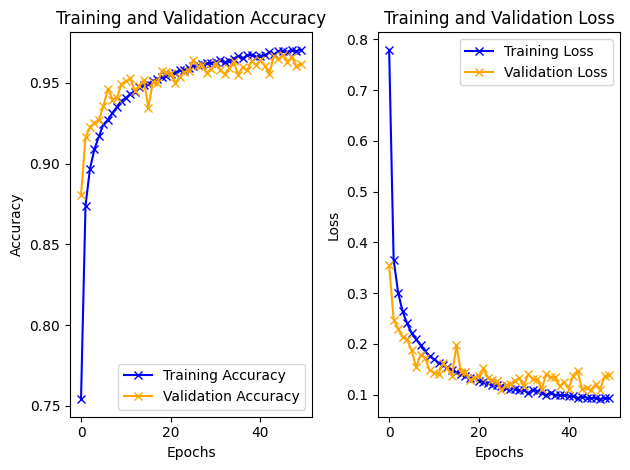

In [9]:
history = model_vgg16.history

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='x')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='x')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Summary VGG16

Prediction and validation VGG16

In [10]:
# Generate predictions for validation set
val_pred = model_vgg16.predict(validation_generator)
val_pred_classes = np.argmax(val_pred, axis=1)
true_classes = validation_generator.classes

# Classification report
class_report = classification_report(true_classes, val_pred_classes)
print("Classification Report:\n", class_report)

550/550 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.03      0.03       504
           1       0.03      0.03      0.03       497
           2       0.02      0.03      0.02       440
           3       0.02      0.02      0.02       502
           4       0.02      0.02      0.02       454
           5       0.02      0.02      0.02       421
           6       0.01      0.01      0.01       456
           7       0.02      0.02      0.02       410
           8       0.04      0.04      0.04       477
           9       0.05      0.05      0.05       477
          10       0.02      0.02      0.02       465
          11       0.02      0.03      0.02       472
          12       0.03      0.03      0.03       480
          13       0.04      0.04      0.04       430
          14       0.02      0.02      0.02       423
          15       0.03      0.03      0.03       503
          16  

Confusion matrix

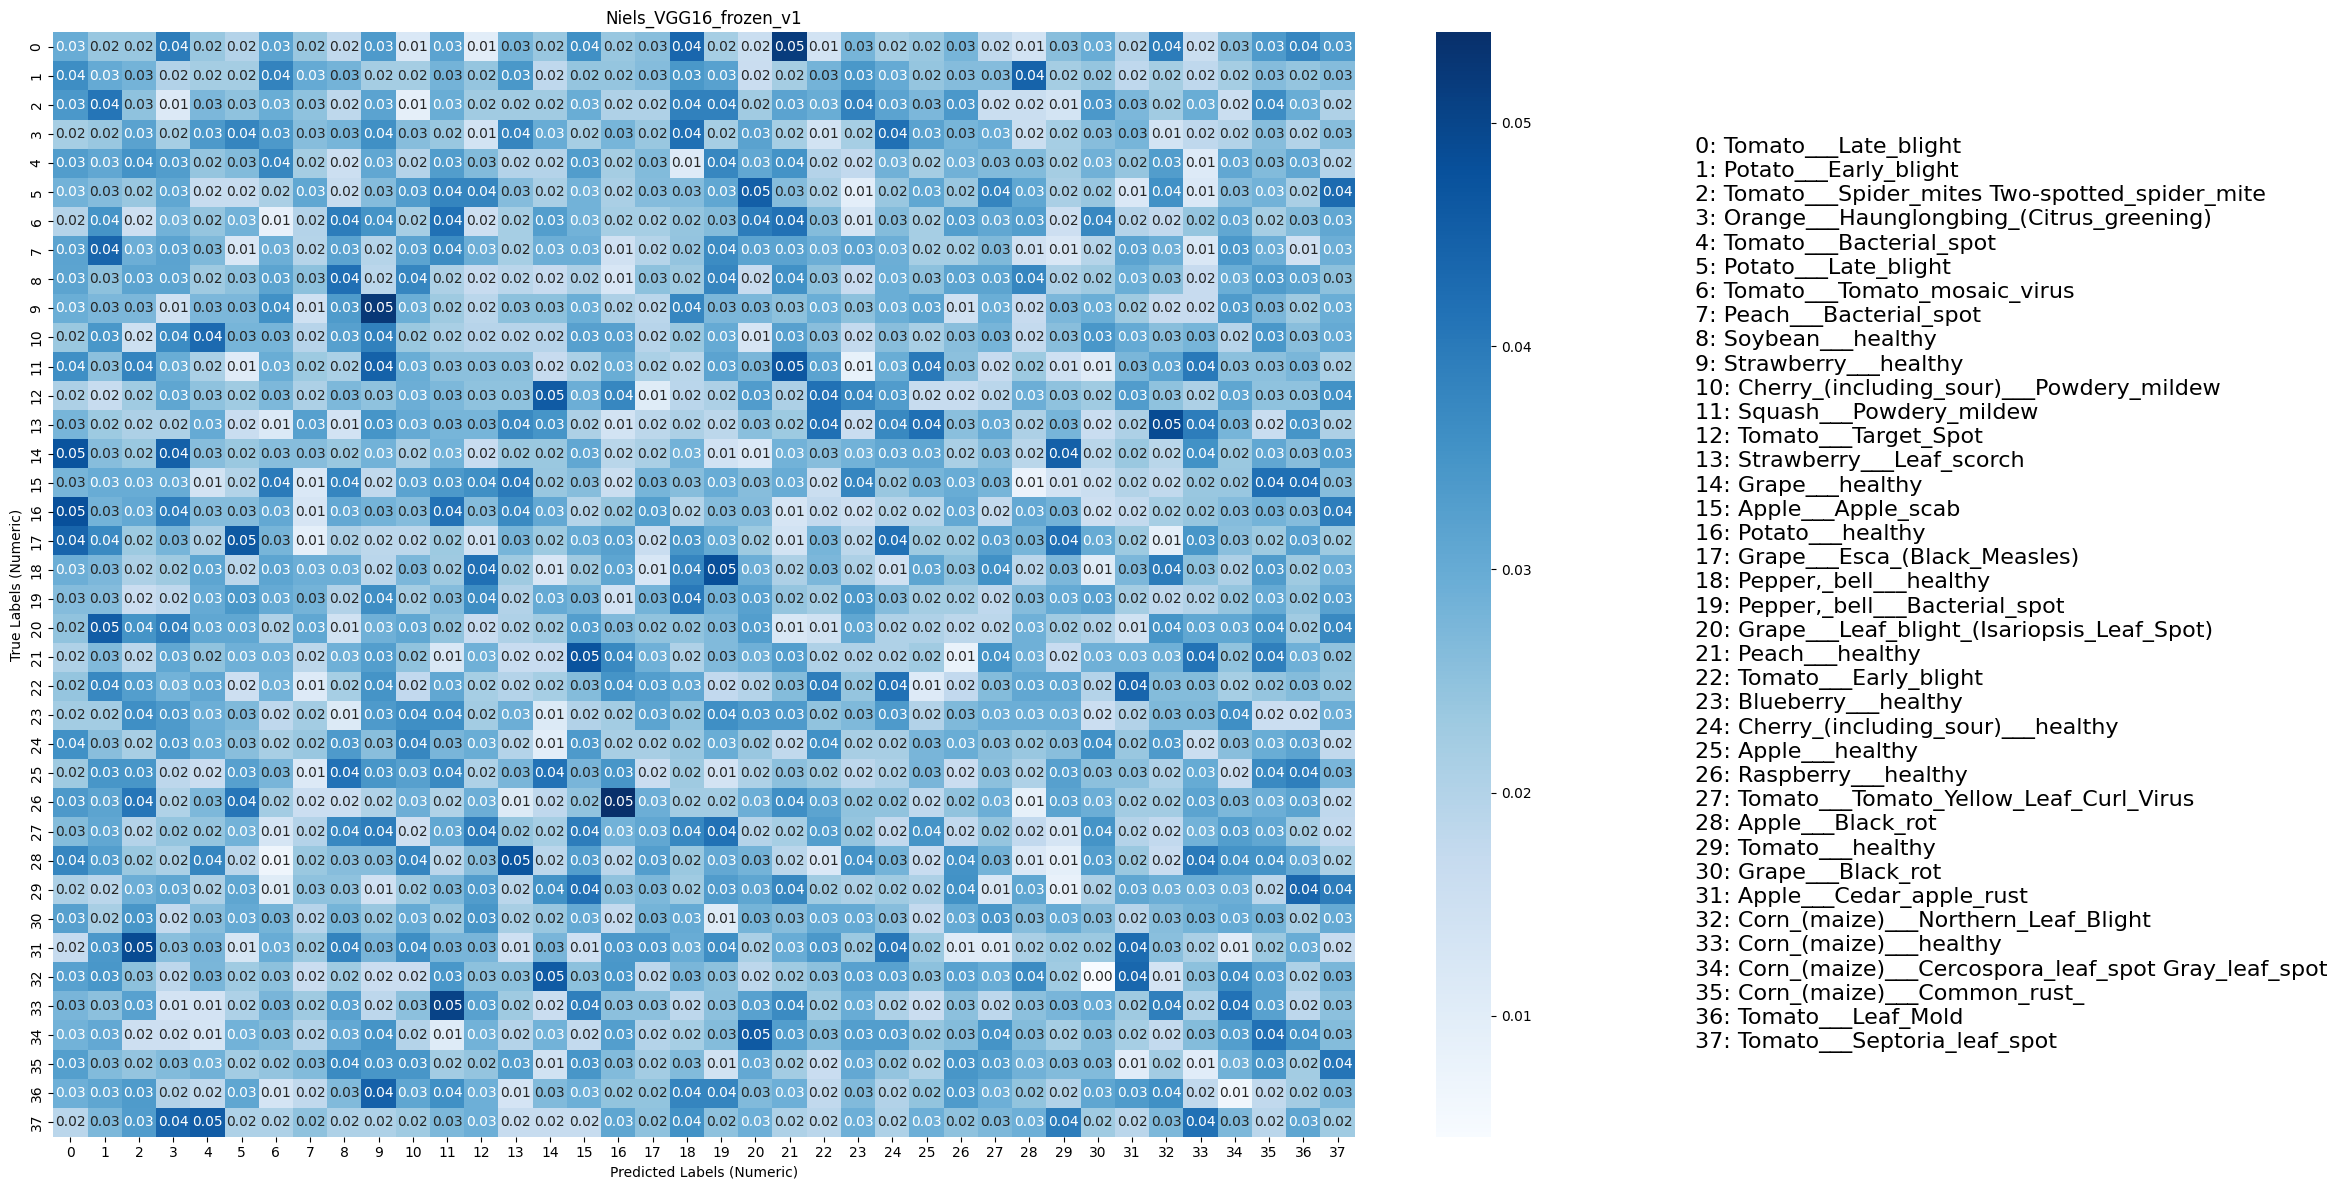

In [11]:
def plot_confusion_matrix (y_true, y_pred, class_names, normalize=False, title=Model_name):
    """
    Plots a heatmap for the confusion matrix with numeric axis labels and a separate legend.

    Parameters:
    - y_true: Array of true labels
    - y_pred: Array of predicted labels
    - class_names: List of class names (for the legend)
    - normalize: If True, normalizes the confusion matrix
    - title: Title for the heatmap
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the heatmap
    plt.figure(figsize=(17, 12))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap='Blues', cbar=True,
                xticklabels=range(len(class_names)), yticklabels=range(len(class_names)))
    plt.title(title)
    plt.ylabel('True Labels (Numeric)')
    plt.xlabel('Predicted Labels (Numeric)')
    plt.tight_layout()

    # Add a legend for the class names
    plt.gcf().text(1, 0.5,
                   "\n".join([f"{i}: {name}" for i, name in enumerate(class_names)]),
                   fontsize=16, verticalalignment='center', horizontalalignment='left')

    plt.show()

# Extract class names
class_names = [folder_name for folder_name in os.listdir(valid_path) if os.path.isdir(os.path.join(valid_path, folder_name))]
#print("Class Names:", class_names)

plot_confusion_matrix(true_classes, val_pred_classes, class_names, normalize=True)

Save the model

In [12]:
model_vgg16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,923,508 (68.37 MB)

 Trainable params: 1,069,606 (4.08 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,139,214 (8.16 MB)

In [13]:
!ls

drive  Niels_VGG16_frozen_v1.keras  sample_data


In [14]:
drive.mount('/content/drive')
save_dir = "/content/drive/MyDrive/Planting-Parents_Data_Science_project"
model_vgg16.save(f"{save_dir}/{Model_name}.keras")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load model from google drive

In [15]:
Model_name = 'Niels_VGG16_frozen_v1'

model_path = f"{save_dir}/{Model_name}.keras"

# Load the model
model = load_model(model_path)
print("Model loaded successfully!")

Model loaded successfully!


Evaluate the test folder

In [16]:
# Define helper function to preprocess a single image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img) / 255.0               # Convert to array and rescale
    return img_array

# Load and preprocess all images from the test folder
def load_test_images(test_path, target_size):
    test_images = []
    filenames = []
    for file in os.listdir(test_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Supported file formats
            file_path = os.path.join(test_path, file)
            test_images.append(preprocess_image(file_path, target_size))
            filenames.append(file)  # Save filenames for reference
    return np.array(test_images), filenames

# Function to check if prediction is correct based on common words
def is_prediction_correct(file_name, predicted_label):
    # Extract meaningful words from file name (split camel case or concatenated words)
    file_name = re.sub(r'\.\w+$', '', file_name)  # Remove file extension
    file_words = set(word.lower() for word in re.findall(r'[A-Z][a-z]*|[a-z]+', file_name))  # Handle camel case and lowercase

    # Extract meaningful words from predicted label
    label_words = set(word.lower() for word in re.findall(r'[A-Za-z]+', predicted_label))  # Convert to lowercase

    # Check if all file words are in the label words
    is_subset = file_words.issubset(label_words)

    # Debugging output to verify
    #print(f"File Words: {file_words}, Label Words: {label_words}, Is Subset: {is_subset}")

    return is_subset

# Parameters
IMG_SIZE = (256, 256)  # Adjust to model's input size
test_path = test_path  # Define the test folder path

# Load and preprocess test images
test_images, filenames = load_test_images(test_path, target_size=IMG_SIZE)

# Make Predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_labels = train_generator.class_indices
class_indices = {v: k for k, v in class_labels.items()}  # Reverse mapping of class indices
predicted_labels = [class_indices[idx] for idx in predicted_classes]

# Process and evaluate predictions
results = []

for file, pred, label in zip(filenames, predictions, predicted_labels):
    confidence = np.max(pred)  # Get the highest probability (confidence score)
    is_correct = is_prediction_correct(file, label)  # Check prediction correctness
    results.append({"True class": file, "prediction": label, "confidence": confidence, "Correct": int(is_correct)})
    print(f"True class: {file}, Prediction: {label}, Confidence: {confidence:.2f}, Correct: {is_correct}")

# Summary of results
correct_predictions = sum(result['Correct'] for result in results)
total_predictions = len(results)
accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f"Total Predictions: {total_predictions}, Correct: {correct_predictions}, Accuracy: {accuracy:.2%}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
True class: TomatoYellowCurlVirus2.JPG, Prediction: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 1.00, Correct: True
True class: TomatoYellowCurlVirus3.JPG, Prediction: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 1.00, Correct: True
True class: TomatoEarlyBlight3.JPG, Prediction: Tomato___Early_blight, Confidence: 0.92, Correct: True
True class: TomatoEarlyBlight1.JPG, Prediction: Tomato___Early_blight, Confidence: 1.00, Correct: True
True class: AppleCedarRust3.JPG, Prediction: Apple___Cedar_apple_rust, Confidence: 1.00, Correct: True
True class: TomatoEarlyBlight2.JPG, Prediction: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 0.36, Correct: False
True class: TomatoYellowCurlVirus6.JPG, Prediction: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 1.00, Correct: True
True class: PotatoHealthy2.JPG, Prediction: Potato___healthy, Confidence: 1.00, Correct: True
True class: AppleCedarRust2.JPG, Prediction: Apple___Cedar_apple_rus

In [17]:
# Define helper function to preprocess a single image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img) / 255.0               # Convert to array and rescale
    return img_array

# Load and preprocess all images from the test folder
def load_test_images(test_path, target_size):
    test_images = []
    filenames = []
    for file in os.listdir(test_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Supported file formats
            file_path = os.path.join(test_path, file)
            test_images.append(preprocess_image(file_path, target_size))
            filenames.append(file)  # Save filenames for reference
    return np.array(test_images), filenames

# Parameters
IMG_SIZE = (256, 256)  # Adjust to model's input size
test_path = test_path

# Load and preprocess test images
test_images, filenames = load_test_images(test_path, target_size=IMG_SIZE)

# Make Predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_labels = train_generator.class_indices
class_indices = {v: k for k, v in class_labels.items()}  # Reverse mapping of class indices
predicted_labels = [class_indices[idx] for idx in predicted_classes]

# Print predictions with filenames
results = []

for file, pred, label in zip(filenames, predictions, predicted_labels):
    confidence = np.max(pred)  # Get the highest probability (confidence score)
    print(f"True class:{file}, Predictions:{label} (Confidence: {confidence:.2f})")

    # Pause and ask for feedback
    feedback = input("Is the prediction correct? (1 for Yes, 0 for No): ")
    if feedback == "1":
        results.append({"file": file, "prediction": label, "confidence": confidence, "Correct": "1"})
    else:
        results.append({"file": file, "prediction": label, "confidence": confidence, "Correct": "0"})

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
True class:TomatoYellowCurlVirus2.JPG, Predictions:Tomato___Tomato_Yellow_Leaf_Curl_Virus (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoYellowCurlVirus3.JPG, Predictions:Tomato___Tomato_Yellow_Leaf_Curl_Virus (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoEarlyBlight3.JPG, Predictions:Tomato___Early_blight (Confidence: 0.92)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoEarlyBlight1.JPG, Predictions:Tomato___Early_blight (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:AppleCedarRust3.JPG, Predictions:Apple___Cedar_apple_rust (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoEarlyBlight2.JPG, Predictions:Tomato___Tomato_Yellow_Leaf_Curl_Virus (Confidence: 0.36)
Is the prediction correct? (1 for Yes, 0 for No): 0
True class:TomatoYellowCurlVirus6.JPG, Predictions:Tomato___Tom

Create DataFrame and save as CSV in google drive

In [20]:
# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Print the DataFrame
print("\nSummary of Predictions and Feedback:")
display(df_results)

# Save DataFrame to CSV
output_csv_path = f"{save_dir}/{Model_name}_predictions.csv"  # Specify the output file path
df_results.to_csv(output_csv_path, index=False)

print(f"Predictions have been saved to {output_csv_path}")


Summary of Predictions and Feedback:


,file,prediction,confidence,Correct
0,TomatoYellowCurlVirus2.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus,1.000000,1
1,TomatoYellowCurlVirus3.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus,1.000000,1
2,TomatoEarlyBlight3.JPG,Tomato___Early_blight,0.923053,1
3,TomatoEarlyBlight1.JPG,Tomato___Early_blight,0.998695,1
4,AppleCedarRust3.JPG,Apple___Cedar_apple_rust,1.000000,1
5,TomatoEarlyBlight2.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.363533,0
6,TomatoYellowCurlVirus6.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus,1.000000,1
7,PotatoHealthy2.JPG,Potato___healthy,1.000000,1
8,AppleCedarRust2.JPG,Apple___Cedar_apple_rust,1.000000,1
9,PotatoEarlyBlight5.JPG,Potato___Early_blight,0.999092,1


Predictions have been saved to /content/drive/MyDrive/Planting-Parents_Data_Science_project/Niels_VGG16_frozen_v1_predictions.csv


prediction accuracy

In [19]:
df_results["Correct"].value_counts(normalize=True)

,proportion
Correct,
1,0.969697
0,0.030303
